In [1]:
!pip install stellargraph

Looking in indexes: https://pypi.org/simple, https://us-python.pkg.dev/colab-wheels/public/simple/
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 435.2/435.2 KB 14.7 MB/s eta 0:00:00


In [2]:
!pip install networkx==2.3

Looking in indexes: https://pypi.org/simple, https://us-python.pkg.dev/colab-wheels/public/simple/
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 1.7/1.7 MB 32.4 MB/s eta 0:00:00
  Preparing metadata (setup.py) ... done
  Created wheel for networkx: filename=networkx-2.3-py2.py3-none-any.whl size=1556009 sha256=0b7fb4a54821f54e8a7acae03740edd4a75423786c025e7d0306b521d9e8c483
  Stored in directory: /root/.cache/pip/wheels/ff/62/9e/0ed2d25fd4f5761e2d19568cda0c32716556dfa682e65ecf64
Successfully built networkx
  Attempting uninstall: networkx
    Found existing installation: networkx 3.0
    Uninstalling networkx-3.0:
      Successfully uninstalled networkx-3.0


In [3]:
# importing all necessary libraries
import networkx as nx
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import string
import os
import networkx as nx
import stellargraph as sg
from stellargraph import StellarGraph
from sklearn import preprocessing, model_selection
from IPython.display import display, HTML
import matplotlib.pyplot as plt
from sklearn.decomposition import PCA
#from node2vec import Node2Vec as n2v
sns.set()

%matplotlib inline

In [4]:
#importing libraries
import numpy as np
import pandas as pd
import nltk
import matplotlib.pyplot as plt
import statistics
import math
import os
from sklearn.model_selection import KFold, StratifiedKFold, cross_val_score
from sklearn.metrics import confusion_matrix
nltk.download('stopwords')
nltk.download('punkt')
nltk.download('wordnet')
nltk.download('omw-1.4')

import re
pd.set_option('max_colwidth', 800)


#importing Libraies
import networkx as nx
import matplotlib.pyplot as plt
from numpy import genfromtxt
import collections
from collections import OrderedDict

import matplotlib.pyplot as plt
%matplotlib inline
from sklearn.model_selection import train_test_split
from sklearn.model_selection import KFold
from sklearn.model_selection import cross_val_score
from sklearn.tree import DecisionTreeClassifier
from sklearn.feature_selection import SelectFromModel
from sklearn.svm import SVC
from sklearn.preprocessing import StandardScaler,MinMaxScaler
from sklearn.linear_model import LinearRegression,LogisticRegression, RidgeClassifier
from sklearn.discriminant_analysis import LinearDiscriminantAnalysis, QuadraticDiscriminantAnalysis
from sklearn.ensemble import RandomForestClassifier
from sklearn.preprocessing import LabelEncoder
from sklearn.metrics import classification_report,accuracy_score

[nltk_data] Downloading package stopwords to /root/nltk_data...
[nltk_data]   Unzipping corpora/stopwords.zip.
[nltk_data] Downloading package punkt to /root/nltk_data...
[nltk_data]   Unzipping tokenizers/punkt.zip.
[nltk_data] Downloading package wordnet to /root/nltk_data...
[nltk_data] Downloading package omw-1.4 to /root/nltk_data...


In [5]:
#loading dataset
df=pd.read_csv('/content/IBM_Dataset_v3.csv')
df.head()

,Age,Attrition,BusinessTravel,DailyRate,Department,DistanceFromHome,Education,EducationField,EmployeeCount,EmployeeNumber,...,RelationshipSatisfaction,StandardHours,StockOptionLevel,TotalWorkingYears,TrainingTimesLastYear,WorkLifeBalance,YearsAtCompany,YearsInCurrentRole,YearsSinceLastPromotion,YearsWithCurrManager
0,41,Yes,Travel_Rarely,1102,Sales,1,2,Life Sciences,1,1,...,1,80,0,8,0,1,6,4,0,5
1,49,No,Travel_Frequently,279,Research & Development,8,1,Life Sciences,1,2,...,4,80,1,10,3,3,10,7,1,7
2,37,Yes,Travel_Rarely,1373,Research & Development,2,2,Other,1,4,...,2,80,0,7,3,3,0,0,0,0
3,33,No,Travel_Frequently,1392,Research & Development,3,4,Life Sciences,1,5,...,3,80,0,8,3,3,8,7,3,0
4,27,No,Travel_Rarely,591,Research & Development,2,1,Medical,1,7,...,4,80,1,6,3,3,2,2,2,2


In [6]:
df.shape

(1470, 35)

In [7]:
df.shape

(1470, 35)

In [8]:
df['Attrition'].value_counts()

No     1233
Yes     237
Name: Attrition, dtype: int64

In [9]:
df.isnull().sum()

Age                         0
Attrition                   0
BusinessTravel              0
DailyRate                   0
Department                  0
DistanceFromHome            0
Education                   0
EducationField              0
EmployeeCount               0
EmployeeNumber              0
EnvironmentSatisfaction     0
Gender                      0
HourlyRate                  0
JobInvolvement              0
JobLevel                    0
JobRole                     0
JobSatisfaction             0
MaritalStatus               0
MonthlyIncome               0
MonthlyRate                 0
NumCompaniesWorked          0
Over18                      0
OverTime                    0
PercentSalaryHike           0
PerformanceRating           0
RelationshipSatisfaction    0
StandardHours               0
StockOptionLevel            0
TotalWorkingYears           0
TrainingTimesLastYear       0
WorkLifeBalance             0
YearsAtCompany              0
YearsInCurrentRole          0
YearsSince

array([[<AxesSubplot:title={'center':'Age'}>,
        <AxesSubplot:title={'center':'DailyRate'}>,
        <AxesSubplot:title={'center':'DistanceFromHome'}>,
        <AxesSubplot:title={'center':'Education'}>,
        <AxesSubplot:title={'center':'EmployeeCount'}>],
       [<AxesSubplot:title={'center':'EmployeeNumber'}>,
        <AxesSubplot:title={'center':'EnvironmentSatisfaction'}>,
        <AxesSubplot:title={'center':'HourlyRate'}>,
        <AxesSubplot:title={'center':'JobInvolvement'}>,
        <AxesSubplot:title={'center':'JobLevel'}>],
       [<AxesSubplot:title={'center':'JobSatisfaction'}>,
        <AxesSubplot:title={'center':'MonthlyIncome'}>,
        <AxesSubplot:title={'center':'MonthlyRate'}>,
        <AxesSubplot:title={'center':'NumCompaniesWorked'}>,
        <AxesSubplot:title={'center':'PercentSalaryHike'}>],
       [<AxesSubplot:title={'center':'PerformanceRating'}>,
        <AxesSubplot:title={'center':'RelationshipSatisfaction'}>,
        <AxesSubplot:title={'cen

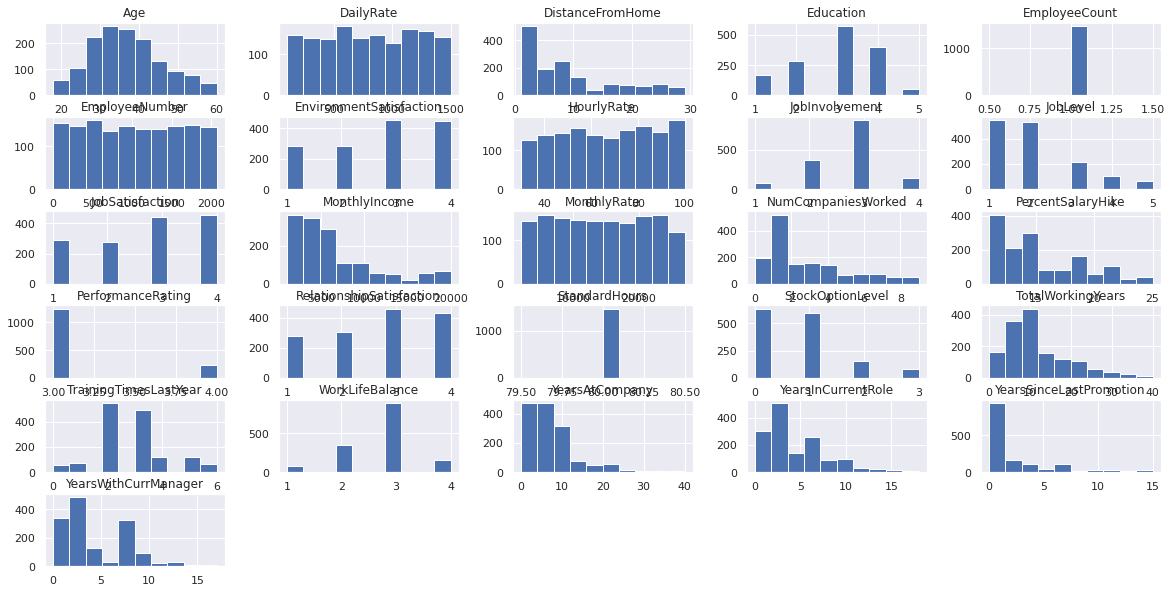

In [10]:
df.hist(figsize=(20,10))

In [11]:
df.head()

,Age,Attrition,BusinessTravel,DailyRate,Department,DistanceFromHome,Education,EducationField,EmployeeCount,EmployeeNumber,...,RelationshipSatisfaction,StandardHours,StockOptionLevel,TotalWorkingYears,TrainingTimesLastYear,WorkLifeBalance,YearsAtCompany,YearsInCurrentRole,YearsSinceLastPromotion,YearsWithCurrManager
0,41,Yes,Travel_Rarely,1102,Sales,1,2,Life Sciences,1,1,...,1,80,0,8,0,1,6,4,0,5
1,49,No,Travel_Frequently,279,Research & Development,8,1,Life Sciences,1,2,...,4,80,1,10,3,3,10,7,1,7
2,37,Yes,Travel_Rarely,1373,Research & Development,2,2,Other,1,4,...,2,80,0,7,3,3,0,0,0,0
3,33,No,Travel_Frequently,1392,Research & Development,3,4,Life Sciences,1,5,...,3,80,0,8,3,3,8,7,3,0
4,27,No,Travel_Rarely,591,Research & Development,2,1,Medical,1,7,...,4,80,1,6,3,3,2,2,2,2


In [12]:
feat_cat=[feature for feature in df.columns if df[feature].dtype =='O']
feat_cat

['Attrition',
 'BusinessTravel',
 'Department',
 'EducationField',
 'Gender',
 'JobRole',
 'MaritalStatus',
 'Over18',
 'OverTime']

In [13]:
ordinal_label=df['BusinessTravel'].value_counts().to_dict()
g={k:i for i,k in enumerate(ordinal_label, 0)}
g

{'Travel_Rarely': 0, 'Travel_Frequently': 1, 'Non-Travel': 2}

In [14]:
df['BusinessTravel']=df['BusinessTravel'].map(g)
df.head()

,Age,Attrition,BusinessTravel,DailyRate,Department,DistanceFromHome,Education,EducationField,EmployeeCount,EmployeeNumber,...,RelationshipSatisfaction,StandardHours,StockOptionLevel,TotalWorkingYears,TrainingTimesLastYear,WorkLifeBalance,YearsAtCompany,YearsInCurrentRole,YearsSinceLastPromotion,YearsWithCurrManager
0,41,Yes,0,1102,Sales,1,2,Life Sciences,1,1,...,1,80,0,8,0,1,6,4,0,5
1,49,No,1,279,Research & Development,8,1,Life Sciences,1,2,...,4,80,1,10,3,3,10,7,1,7
2,37,Yes,0,1373,Research & Development,2,2,Other,1,4,...,2,80,0,7,3,3,0,0,0,0
3,33,No,1,1392,Research & Development,3,4,Life Sciences,1,5,...,3,80,0,8,3,3,8,7,3,0
4,27,No,0,591,Research & Development,2,1,Medical,1,7,...,4,80,1,6,3,3,2,2,2,2


In [15]:
ordinal_label=df['Department'].value_counts().to_dict()
g={k:i for i,k in enumerate(ordinal_label, 0)}
g

{'Research & Development': 0, 'Sales': 1, 'Human Resources': 2}

In [16]:
df['Department']=df['Department'].map(g)
df.head()

,Age,Attrition,BusinessTravel,DailyRate,Department,DistanceFromHome,Education,EducationField,EmployeeCount,EmployeeNumber,...,RelationshipSatisfaction,StandardHours,StockOptionLevel,TotalWorkingYears,TrainingTimesLastYear,WorkLifeBalance,YearsAtCompany,YearsInCurrentRole,YearsSinceLastPromotion,YearsWithCurrManager
0,41,Yes,0,1102,1,1,2,Life Sciences,1,1,...,1,80,0,8,0,1,6,4,0,5
1,49,No,1,279,0,8,1,Life Sciences,1,2,...,4,80,1,10,3,3,10,7,1,7
2,37,Yes,0,1373,0,2,2,Other,1,4,...,2,80,0,7,3,3,0,0,0,0
3,33,No,1,1392,0,3,4,Life Sciences,1,5,...,3,80,0,8,3,3,8,7,3,0
4,27,No,0,591,0,2,1,Medical,1,7,...,4,80,1,6,3,3,2,2,2,2


In [17]:
ordinal_label=df['EducationField'].value_counts().to_dict()
g={k:i for i,k in enumerate(ordinal_label, 0)}
g

{'Life Sciences': 0,
 'Medical': 1,
 'Marketing': 2,
 'Technical Degree': 3,
 'Other': 4,
 'Human Resources': 5}

In [18]:
df['EducationField']=df['EducationField'].map(g)
df.head()

,Age,Attrition,BusinessTravel,DailyRate,Department,DistanceFromHome,Education,EducationField,EmployeeCount,EmployeeNumber,...,RelationshipSatisfaction,StandardHours,StockOptionLevel,TotalWorkingYears,TrainingTimesLastYear,WorkLifeBalance,YearsAtCompany,YearsInCurrentRole,YearsSinceLastPromotion,YearsWithCurrManager
0,41,Yes,0,1102,1,1,2,0,1,1,...,1,80,0,8,0,1,6,4,0,5
1,49,No,1,279,0,8,1,0,1,2,...,4,80,1,10,3,3,10,7,1,7
2,37,Yes,0,1373,0,2,2,4,1,4,...,2,80,0,7,3,3,0,0,0,0
3,33,No,1,1392,0,3,4,0,1,5,...,3,80,0,8,3,3,8,7,3,0
4,27,No,0,591,0,2,1,1,1,7,...,4,80,1,6,3,3,2,2,2,2


In [19]:
ordinal_label=df['Gender'].value_counts().to_dict()
g={k:i for i,k in enumerate(ordinal_label, 0)}
g

{'Male': 0, 'Female': 1}

In [20]:
df['Gender']=df['Gender'].map(g)
df.head()

,Age,Attrition,BusinessTravel,DailyRate,Department,DistanceFromHome,Education,EducationField,EmployeeCount,EmployeeNumber,...,RelationshipSatisfaction,StandardHours,StockOptionLevel,TotalWorkingYears,TrainingTimesLastYear,WorkLifeBalance,YearsAtCompany,YearsInCurrentRole,YearsSinceLastPromotion,YearsWithCurrManager
0,41,Yes,0,1102,1,1,2,0,1,1,...,1,80,0,8,0,1,6,4,0,5
1,49,No,1,279,0,8,1,0,1,2,...,4,80,1,10,3,3,10,7,1,7
2,37,Yes,0,1373,0,2,2,4,1,4,...,2,80,0,7,3,3,0,0,0,0
3,33,No,1,1392,0,3,4,0,1,5,...,3,80,0,8,3,3,8,7,3,0
4,27,No,0,591,0,2,1,1,1,7,...,4,80,1,6,3,3,2,2,2,2


In [21]:
ordinal_label=df['JobRole'].value_counts().to_dict()
g={k:i for i,k in enumerate(ordinal_label, 0)}
g

{'Sales Executive': 0,
 'Research Scientist': 1,
 'Laboratory Technician': 2,
 'Manufacturing Director': 3,
 'Healthcare Representative': 4,
 'Manager': 5,
 'Sales Representative': 6,
 'Research Director': 7,
 'Human Resources': 8}

In [22]:
df['JobRole']=df['JobRole'].map(g)
df.head()

,Age,Attrition,BusinessTravel,DailyRate,Department,DistanceFromHome,Education,EducationField,EmployeeCount,EmployeeNumber,...,RelationshipSatisfaction,StandardHours,StockOptionLevel,TotalWorkingYears,TrainingTimesLastYear,WorkLifeBalance,YearsAtCompany,YearsInCurrentRole,YearsSinceLastPromotion,YearsWithCurrManager
0,41,Yes,0,1102,1,1,2,0,1,1,...,1,80,0,8,0,1,6,4,0,5
1,49,No,1,279,0,8,1,0,1,2,...,4,80,1,10,3,3,10,7,1,7
2,37,Yes,0,1373,0,2,2,4,1,4,...,2,80,0,7,3,3,0,0,0,0
3,33,No,1,1392,0,3,4,0,1,5,...,3,80,0,8,3,3,8,7,3,0
4,27,No,0,591,0,2,1,1,1,7,...,4,80,1,6,3,3,2,2,2,2


In [23]:
ordinal_label=df['MaritalStatus'].value_counts().to_dict()
g={k:i for i,k in enumerate(ordinal_label, 0)}
g

{'Married': 0, 'Single': 1, 'Divorced': 2}

In [24]:
df['MaritalStatus']=df['MaritalStatus'].map(g)
df.head()

,Age,Attrition,BusinessTravel,DailyRate,Department,DistanceFromHome,Education,EducationField,EmployeeCount,EmployeeNumber,...,RelationshipSatisfaction,StandardHours,StockOptionLevel,TotalWorkingYears,TrainingTimesLastYear,WorkLifeBalance,YearsAtCompany,YearsInCurrentRole,YearsSinceLastPromotion,YearsWithCurrManager
0,41,Yes,0,1102,1,1,2,0,1,1,...,1,80,0,8,0,1,6,4,0,5
1,49,No,1,279,0,8,1,0,1,2,...,4,80,1,10,3,3,10,7,1,7
2,37,Yes,0,1373,0,2,2,4,1,4,...,2,80,0,7,3,3,0,0,0,0
3,33,No,1,1392,0,3,4,0,1,5,...,3,80,0,8,3,3,8,7,3,0
4,27,No,0,591,0,2,1,1,1,7,...,4,80,1,6,3,3,2,2,2,2


In [25]:
ordinal_label=df['Over18'].value_counts().to_dict()
g={k:i for i,k in enumerate(ordinal_label, 0)}
g

{'Y': 0}

In [26]:
df['Over18']=df['Over18'].map(g)
df.head()

,Age,Attrition,BusinessTravel,DailyRate,Department,DistanceFromHome,Education,EducationField,EmployeeCount,EmployeeNumber,...,RelationshipSatisfaction,StandardHours,StockOptionLevel,TotalWorkingYears,TrainingTimesLastYear,WorkLifeBalance,YearsAtCompany,YearsInCurrentRole,YearsSinceLastPromotion,YearsWithCurrManager
0,41,Yes,0,1102,1,1,2,0,1,1,...,1,80,0,8,0,1,6,4,0,5
1,49,No,1,279,0,8,1,0,1,2,...,4,80,1,10,3,3,10,7,1,7
2,37,Yes,0,1373,0,2,2,4,1,4,...,2,80,0,7,3,3,0,0,0,0
3,33,No,1,1392,0,3,4,0,1,5,...,3,80,0,8,3,3,8,7,3,0
4,27,No,0,591,0,2,1,1,1,7,...,4,80,1,6,3,3,2,2,2,2


In [27]:
ordinal_label=df['OverTime'].value_counts().to_dict()
g={k:i for i,k in enumerate(ordinal_label, 0)}
g

{'No': 0, 'Yes': 1}

In [28]:
df['OverTime']=df['OverTime'].map(g)
df.head()

,Age,Attrition,BusinessTravel,DailyRate,Department,DistanceFromHome,Education,EducationField,EmployeeCount,EmployeeNumber,...,RelationshipSatisfaction,StandardHours,StockOptionLevel,TotalWorkingYears,TrainingTimesLastYear,WorkLifeBalance,YearsAtCompany,YearsInCurrentRole,YearsSinceLastPromotion,YearsWithCurrManager
0,41,Yes,0,1102,1,1,2,0,1,1,...,1,80,0,8,0,1,6,4,0,5
1,49,No,1,279,0,8,1,0,1,2,...,4,80,1,10,3,3,10,7,1,7
2,37,Yes,0,1373,0,2,2,4,1,4,...,2,80,0,7,3,3,0,0,0,0
3,33,No,1,1392,0,3,4,0,1,5,...,3,80,0,8,3,3,8,7,3,0
4,27,No,0,591,0,2,1,1,1,7,...,4,80,1,6,3,3,2,2,2,2


In [29]:
ordinal_label=df['Attrition'].value_counts().to_dict()
g={k:i for i,k in enumerate(ordinal_label, 0)}
g

{'No': 0, 'Yes': 1}

In [30]:
df['Attrition']=df['Attrition'].map(g)
df.head()

,Age,Attrition,BusinessTravel,DailyRate,Department,DistanceFromHome,Education,EducationField,EmployeeCount,EmployeeNumber,...,RelationshipSatisfaction,StandardHours,StockOptionLevel,TotalWorkingYears,TrainingTimesLastYear,WorkLifeBalance,YearsAtCompany,YearsInCurrentRole,YearsSinceLastPromotion,YearsWithCurrManager
0,41,1,0,1102,1,1,2,0,1,1,...,1,80,0,8,0,1,6,4,0,5
1,49,0,1,279,0,8,1,0,1,2,...,4,80,1,10,3,3,10,7,1,7
2,37,1,0,1373,0,2,2,4,1,4,...,2,80,0,7,3,3,0,0,0,0
3,33,0,1,1392,0,3,4,0,1,5,...,3,80,0,8,3,3,8,7,3,0
4,27,0,0,591,0,2,1,1,1,7,...,4,80,1,6,3,3,2,2,2,2


In [31]:
column_to_move = df.pop("Attrition")
df.insert(34, "Attrition", column_to_move)
df.head()

,Age,BusinessTravel,DailyRate,Department,DistanceFromHome,Education,EducationField,EmployeeCount,EmployeeNumber,EnvironmentSatisfaction,...,StandardHours,StockOptionLevel,TotalWorkingYears,TrainingTimesLastYear,WorkLifeBalance,YearsAtCompany,YearsInCurrentRole,YearsSinceLastPromotion,YearsWithCurrManager,Attrition
0,41,0,1102,1,1,2,0,1,1,2,...,80,0,8,0,1,6,4,0,5,1
1,49,1,279,0,8,1,0,1,2,3,...,80,1,10,3,3,10,7,1,7,0
2,37,0,1373,0,2,2,4,1,4,4,...,80,0,7,3,3,0,0,0,0,1
3,33,1,1392,0,3,4,0,1,5,4,...,80,0,8,3,3,8,7,3,0,0
4,27,0,591,0,2,1,1,1,7,1,...,80,1,6,3,3,2,2,2,2,0


In [32]:
scale_data=[feature for feature in df.columns if feature not in ['Attrition']]
from sklearn.preprocessing import StandardScaler, MinMaxScaler
scaler=StandardScaler()
df[scale_data]=scaler.fit_transform(df[scale_data])
df.head()

,Age,BusinessTravel,DailyRate,Department,DistanceFromHome,Education,EducationField,EmployeeCount,EmployeeNumber,EnvironmentSatisfaction,...,StandardHours,StockOptionLevel,TotalWorkingYears,TrainingTimesLastYear,WorkLifeBalance,YearsAtCompany,YearsInCurrentRole,YearsSinceLastPromotion,YearsWithCurrManager,Attrition
0,0.446350,-0.590048,0.742527,1.074178,-1.010909,-0.891688,-0.865922,0.0,-1.701283,-0.660531,...,0.0,-0.932014,-0.421642,-2.171982,-2.493820,-0.164613,-0.063296,-0.679146,0.245834,1
1,1.322365,0.913194,-1.297775,-0.684220,-0.147150,-1.868426,-0.865922,0.0,-1.699621,0.254625,...,0.0,0.241988,-0.164511,0.155707,0.338096,0.488508,0.764998,-0.368715,0.806541,0
2,0.008343,-0.590048,1.414363,-0.684220,-0.887515,-0.891688,2.236832,0.0,-1.696298,1.169781,...,0.0,-0.932014,-0.550208,0.155707,0.338096,-1.144294,-1.167687,-0.679146,-1.155935,1
3,-0.429664,0.913194,1.461466,-0.684220,-0.764121,1.061787,-0.865922,0.0,-1.694636,1.169781,...,0.0,-0.932014,-0.421642,0.155707,0.338096,0.161947,0.764998,0.252146,-1.155935,0
4,-1.086676,-0.590048,-0.524295,-0.684220,-0.887515,-1.868426,-0.090233,0.0,-1.691313,-1.575686,...,0.0,0.241988,-0.678774,0.155707,0.338096,-0.817734,-0.615492,-0.058285,-0.595227,0


In [33]:
u3 = df.drop(['Attrition'], axis = 1)
u3.head()

,Age,BusinessTravel,DailyRate,Department,DistanceFromHome,Education,EducationField,EmployeeCount,EmployeeNumber,EnvironmentSatisfaction,...,RelationshipSatisfaction,StandardHours,StockOptionLevel,TotalWorkingYears,TrainingTimesLastYear,WorkLifeBalance,YearsAtCompany,YearsInCurrentRole,YearsSinceLastPromotion,YearsWithCurrManager
0,0.446350,-0.590048,0.742527,1.074178,-1.010909,-0.891688,-0.865922,0.0,-1.701283,-0.660531,...,-1.584178,0.0,-0.932014,-0.421642,-2.171982,-2.493820,-0.164613,-0.063296,-0.679146,0.245834
1,1.322365,0.913194,-1.297775,-0.684220,-0.147150,-1.868426,-0.865922,0.0,-1.699621,0.254625,...,1.191438,0.0,0.241988,-0.164511,0.155707,0.338096,0.488508,0.764998,-0.368715,0.806541
2,0.008343,-0.590048,1.414363,-0.684220,-0.887515,-0.891688,2.236832,0.0,-1.696298,1.169781,...,-0.658973,0.0,-0.932014,-0.550208,0.155707,0.338096,-1.144294,-1.167687,-0.679146,-1.155935
3,-0.429664,0.913194,1.461466,-0.684220,-0.764121,1.061787,-0.865922,0.0,-1.694636,1.169781,...,0.266233,0.0,-0.932014,-0.421642,0.155707,0.338096,0.161947,0.764998,0.252146,-1.155935
4,-1.086676,-0.590048,-0.524295,-0.684220,-0.887515,-1.868426,-0.090233,0.0,-1.691313,-1.575686,...,1.191438,0.0,0.241988,-0.678774,0.155707,0.338096,-0.817734,-0.615492,-0.058285,-0.595227


In [34]:
from scipy.spatial.distance import cdist
s = cdist(u3, u3, 'hamming')
s

array([[0.        , 0.85294118, 0.70588235, ..., 0.67647059, 0.73529412,
        0.73529412],
       [0.85294118, 0.        , 0.76470588, ..., 0.61764706, 0.61764706,
        0.67647059],
       [0.70588235, 0.76470588, 0.        , ..., 0.70588235, 0.67647059,
        0.67647059],
       ...,
       [0.67647059, 0.61764706, 0.70588235, ..., 0.        , 0.73529412,
        0.64705882],
       [0.73529412, 0.61764706, 0.67647059, ..., 0.73529412, 0.        ,
        0.61764706],
       [0.73529412, 0.67647059, 0.67647059, ..., 0.64705882, 0.61764706,
        0.        ]])

In [35]:
X1=pd.DataFrame(s)
X1

,0,1,2,3,4,5,6,7,8,9,...,1460,1461,1462,1463,1464,1465,1466,1467,1468,1469
0,0.000000,0.852941,0.705882,0.676471,0.823529,0.676471,0.764706,0.794118,0.823529,0.764706,...,0.676471,0.764706,0.647059,0.705882,0.705882,0.764706,0.823529,0.676471,0.735294,0.735294
1,0.852941,0.000000,0.764706,0.647059,0.617647,0.735294,0.764706,0.647059,0.588235,0.647059,...,0.735294,0.764706,0.764706,0.676471,0.794118,0.617647,0.588235,0.617647,0.617647,0.676471
2,0.705882,0.764706,0.000000,0.617647,0.647059,0.617647,0.647059,0.558824,0.647059,0.676471,...,0.588235,0.617647,0.823529,0.705882,0.558824,0.676471,0.676471,0.705882,0.676471,0.676471
3,0.676471,0.647059,0.617647,0.000000,0.705882,0.558824,0.676471,0.647059,0.676471,0.705882,...,0.617647,0.735294,0.794118,0.764706,0.676471,0.705882,0.735294,0.735294,0.735294,0.735294
4,0.823529,0.617647,0.647059,0.705882,0.000000,0.676471,0.705882,0.617647,0.794118,0.647059,...,0.705882,0.676471,0.735294,0.705882,0.705882,0.588235,0.617647,0.617647,0.647059,0.558824
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1465,0.764706,0.617647,0.676471,0.705882,0.588235,0.647059,0.647059,0.705882,0.735294,0.588235,...,0.705882,0.705882,0.764706,0.705882,0.764706,0.000000,0.647059,0.617647,0.617647,0.617647
1466,0.823529,0.588235,0.676471,0.735294,0.617647,0.705882,0.705882,0.676471,0.647059,0.588235,...,0.676471,0.617647,0.647059,0.647059,0.735294,0.647059,0.000000,0.735294,0.705882,0.647059
1467,0.676471,0.617647,0.705882,0.735294,0.617647,0.823529,0.647059,0.617647,0.676471,0.705882,...,0.764706,0.676471,0.794118,0.676471,0.764706,0.617647,0.735294,0.000000,0.735294,0.647059
1468,0.735294,0.617647,0.676471,0.735294,0.647059,0.676471,0.735294,0.794118,0.647059,0.617647,...,0.647059,0.676471,0.705882,0.676471,0.647059,0.617647,0.705882,0.735294,0.000000,0.617647


In [36]:
# taking average of the hamming distance matrix
y = np.average(X1)
y

0.6876291468968545

In [37]:
adjmat_df=X1.copy()

In [38]:
# setting threshold value as mean of hamming matrix
adjmat_df[adjmat_df < y]=0
adjmat_df[adjmat_df >= y]=1

In [39]:
# adjacency matrix
adjmat_df

,0,1,2,3,4,5,6,7,8,9,...,1460,1461,1462,1463,1464,1465,1466,1467,1468,1469
0,0.0,1.0,1.0,0.0,1.0,0.0,1.0,1.0,1.0,1.0,...,0.0,1.0,0.0,1.0,1.0,1.0,1.0,0.0,1.0,1.0
1,1.0,0.0,1.0,0.0,0.0,1.0,1.0,0.0,0.0,0.0,...,1.0,1.0,1.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0
2,1.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,1.0,1.0,0.0,0.0,0.0,1.0,0.0,0.0
3,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,1.0,...,0.0,1.0,1.0,1.0,0.0,1.0,1.0,1.0,1.0,1.0
4,1.0,0.0,0.0,1.0,0.0,0.0,1.0,0.0,1.0,0.0,...,1.0,0.0,1.0,1.0,1.0,0.0,0.0,0.0,0.0,0.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1465,1.0,0.0,0.0,1.0,0.0,0.0,0.0,1.0,1.0,0.0,...,1.0,1.0,1.0,1.0,1.0,0.0,0.0,0.0,0.0,0.0
1466,1.0,0.0,0.0,1.0,0.0,1.0,1.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,1.0,0.0,0.0,1.0,1.0,0.0
1467,0.0,0.0,1.0,1.0,0.0,1.0,0.0,0.0,0.0,1.0,...,1.0,0.0,1.0,0.0,1.0,0.0,1.0,0.0,1.0,0.0
1468,1.0,0.0,0.0,1.0,0.0,0.0,1.0,1.0,0.0,0.0,...,0.0,0.0,1.0,0.0,0.0,0.0,1.0,1.0,0.0,0.0


In [40]:
G = nx.from_numpy_matrix(np.array(adjmat_df))
G

In [41]:
A=nx.to_numpy_matrix(G)
A

matrix([[0., 1., 1., ..., 0., 1., 1.],
        [1., 0., 1., ..., 0., 0., 0.],
        [1., 1., 0., ..., 1., 0., 0.],
        ...,
        [0., 0., 1., ..., 0., 1., 0.],
        [1., 0., 0., ..., 1., 0., 0.],
        [1., 0., 0., ..., 0., 0., 0.]])

In [42]:
H=nx.from_numpy_matrix(A)
H

In [43]:
square_feature_dataframe = StellarGraph.from_networkx(H, node_features=adjmat_df)
print(square_feature_dataframe.info())

StellarGraph: Undirected multigraph
 Nodes: 1470, Edges: 540901

 Node types:
  default: [1470]
    Features: float32 vector, length 1470
    Edge types: default-default->default

 Edge types:
    default-default->default: [540901]
        Weights: all 1 (default)
        Features: none


In [44]:
from stellargraph.mapper import (
    CorruptedGenerator,
    FullBatchNodeGenerator,
    GraphSAGENodeGenerator,
    HinSAGENodeGenerator,
    ClusterNodeGenerator,
)
from stellargraph import StellarGraph
from stellargraph.layer import GCN, DeepGraphInfomax, GraphSAGE, GAT, APPNP, HinSAGE

from stellargraph import datasets
from stellargraph.utils import plot_history

import pandas as pd
from matplotlib import pyplot as plt
from sklearn import model_selection
from sklearn.linear_model import LogisticRegression
from sklearn.manifold import TSNE
from IPython.display import display, HTML

from tensorflow.keras.optimizers import Adam
from tensorflow.keras.callbacks import EarlyStopping
import tensorflow as tf
from tensorflow.keras import Model

In [45]:
fullbatch_generator = FullBatchNodeGenerator(square_feature_dataframe, sparse=False)
fullbatch_generator 

Using GCN (local pooling) filters...


In [46]:
gcn_model = GCN(layer_sizes=[128], activations=["relu"], generator=fullbatch_generator)
gcn_model

In [47]:
x_emb_in, x_emb_out = gcn_model.in_out_tensors()

# for full batch models, squeeze out the batch dim (which is 1)
x_out = tf.squeeze(x_emb_out, axis=0)
emb_model = Model(inputs=x_emb_in, outputs=x_out)
emb_model

In [48]:
all_nodes = df['Attrition'].index
all_gen = fullbatch_generator.flow(all_nodes)

In [49]:
emb = emb_model.predict(all_gen)
emb.shape

1/1 [==============================] - 1s 539ms/step


(1470, 128)

In [50]:
node_emb = pd.DataFrame(emb)
node_emb

,0,1,2,3,4,5,6,7,8,9,...,118,119,120,121,122,123,124,125,126,127
0,0.0,0.104812,0.0,0.0,0.010431,0.0,1.943673,0.0,0.0,0.277739,...,0.187232,0.0,0.0,0.0,0.0,0.0,0.290924,0.0,0.0,0.000000
1,0.0,0.032003,0.0,0.0,0.000000,0.0,1.722587,0.0,0.0,0.372099,...,0.375850,0.0,0.0,0.0,0.0,0.0,0.135986,0.0,0.0,0.000000
2,0.0,0.000000,0.0,0.0,0.003119,0.0,1.550425,0.0,0.0,0.320545,...,0.380700,0.0,0.0,0.0,0.0,0.0,0.096159,0.0,0.0,0.000000
3,0.0,0.000000,0.0,0.0,0.000000,0.0,1.613769,0.0,0.0,0.372822,...,0.266842,0.0,0.0,0.0,0.0,0.0,0.130824,0.0,0.0,0.000000
4,0.0,0.000000,0.0,0.0,0.000000,0.0,1.413115,0.0,0.0,0.292715,...,0.284735,0.0,0.0,0.0,0.0,0.0,0.105191,0.0,0.0,0.002397
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1465,0.0,0.000000,0.0,0.0,0.000000,0.0,1.511529,0.0,0.0,0.356055,...,0.274709,0.0,0.0,0.0,0.0,0.0,0.097927,0.0,0.0,0.000000
1466,0.0,0.000000,0.0,0.0,0.000000,0.0,1.707382,0.0,0.0,0.275483,...,0.338131,0.0,0.0,0.0,0.0,0.0,0.081830,0.0,0.0,0.006495
1467,0.0,0.000000,0.0,0.0,0.000000,0.0,1.842797,0.0,0.0,0.444829,...,0.400743,0.0,0.0,0.0,0.0,0.0,0.119762,0.0,0.0,0.000000
1468,0.0,0.039123,0.0,0.0,0.000000,0.0,1.698184,0.0,0.0,0.224923,...,0.244741,0.0,0.0,0.0,0.0,0.0,0.242541,0.0,0.0,0.000000


In [51]:
node_Class = df['Attrition']

In [52]:
node_emb['Class']=node_Class
node_emb

,0,1,2,3,4,5,6,7,8,9,...,119,120,121,122,123,124,125,126,127,Class
0,0.0,0.104812,0.0,0.0,0.010431,0.0,1.943673,0.0,0.0,0.277739,...,0.0,0.0,0.0,0.0,0.0,0.290924,0.0,0.0,0.000000,1
1,0.0,0.032003,0.0,0.0,0.000000,0.0,1.722587,0.0,0.0,0.372099,...,0.0,0.0,0.0,0.0,0.0,0.135986,0.0,0.0,0.000000,0
2,0.0,0.000000,0.0,0.0,0.003119,0.0,1.550425,0.0,0.0,0.320545,...,0.0,0.0,0.0,0.0,0.0,0.096159,0.0,0.0,0.000000,1
3,0.0,0.000000,0.0,0.0,0.000000,0.0,1.613769,0.0,0.0,0.372822,...,0.0,0.0,0.0,0.0,0.0,0.130824,0.0,0.0,0.000000,0
4,0.0,0.000000,0.0,0.0,0.000000,0.0,1.413115,0.0,0.0,0.292715,...,0.0,0.0,0.0,0.0,0.0,0.105191,0.0,0.0,0.002397,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1465,0.0,0.000000,0.0,0.0,0.000000,0.0,1.511529,0.0,0.0,0.356055,...,0.0,0.0,0.0,0.0,0.0,0.097927,0.0,0.0,0.000000,0
1466,0.0,0.000000,0.0,0.0,0.000000,0.0,1.707382,0.0,0.0,0.275483,...,0.0,0.0,0.0,0.0,0.0,0.081830,0.0,0.0,0.006495,0
1467,0.0,0.000000,0.0,0.0,0.000000,0.0,1.842797,0.0,0.0,0.444829,...,0.0,0.0,0.0,0.0,0.0,0.119762,0.0,0.0,0.000000,0
1468,0.0,0.039123,0.0,0.0,0.000000,0.0,1.698184,0.0,0.0,0.224923,...,0.0,0.0,0.0,0.0,0.0,0.242541,0.0,0.0,0.000000,0


In [53]:
emb = pd.concat([u3, node_emb], axis = 1)
emb.head()

,Age,BusinessTravel,DailyRate,Department,DistanceFromHome,Education,EducationField,EmployeeCount,EmployeeNumber,EnvironmentSatisfaction,...,119,120,121,122,123,124,125,126,127,Class
0,0.446350,-0.590048,0.742527,1.074178,-1.010909,-0.891688,-0.865922,0.0,-1.701283,-0.660531,...,0.0,0.0,0.0,0.0,0.0,0.290924,0.0,0.0,0.000000,1
1,1.322365,0.913194,-1.297775,-0.684220,-0.147150,-1.868426,-0.865922,0.0,-1.699621,0.254625,...,0.0,0.0,0.0,0.0,0.0,0.135986,0.0,0.0,0.000000,0
2,0.008343,-0.590048,1.414363,-0.684220,-0.887515,-0.891688,2.236832,0.0,-1.696298,1.169781,...,0.0,0.0,0.0,0.0,0.0,0.096159,0.0,0.0,0.000000,1
3,-0.429664,0.913194,1.461466,-0.684220,-0.764121,1.061787,-0.865922,0.0,-1.694636,1.169781,...,0.0,0.0,0.0,0.0,0.0,0.130824,0.0,0.0,0.000000,0
4,-1.086676,-0.590048,-0.524295,-0.684220,-0.887515,-1.868426,-0.090233,0.0,-1.691313,-1.575686,...,0.0,0.0,0.0,0.0,0.0,0.105191,0.0,0.0,0.002397,0


In [54]:
X=emb.drop(['Class'],axis=1)
Y=emb['Class']

In [55]:
from sklearn.model_selection import train_test_split
from sklearn import tree
from sklearn.metrics import classification_report,accuracy_score
from sklearn import preprocessing
from sklearn.linear_model import LogisticRegression
from sklearn.linear_model import LinearRegression
from sklearn.svm import SVC
from sklearn.svm import LinearSVC
from sklearn import metrics

from sklearn.ensemble import RandomForestClassifier
from sklearn.tree import DecisionTreeClassifier
from sklearn.naive_bayes import MultinomialNB
from sklearn.svm import LinearSVC
from xgboost import XGBClassifier
from xgboost import XGBRegressor
from sklearn.metrics import confusion_matrix, recall_score, precision_score,f1_score
import seaborn as sns

### CROSS VALIDATION

In [56]:
from sklearn.model_selection import KFold
from sklearn.model_selection import StratifiedKFold
from sklearn.model_selection import cross_val_score
cv = KFold(n_splits=10, random_state=1, shuffle=True)
kf = KFold(n_splits=10)

In [57]:
from sklearn.linear_model import LogisticRegression
lr = LogisticRegression(max_iter=10000) 
folds = StratifiedKFold(n_splits=10, shuffle=True, random_state=1)
y_pred = []
y_exp = []

for train_index, test_index in folds.split(X, Y):
    x_train, x_test = X.iloc[train_index], X.iloc[test_index]
    y_train, y_test = Y[train_index], Y[test_index]
    lr.fit(x_train, y_train)
    # store result from classification
    y_pred.extend(lr.predict(x_test))
    # store expected result for this specific fold
    y_exp.extend(y_test)

print("Accuracy: ",  accuracy_score(y_exp, y_pred))
print(classification_report(y_exp, y_pred))
print("Confusion matrix: ", confusion_matrix(y_exp, y_pred))

/usr/local/lib/python3.8/dist-packages/sklearn/utils/validation.py:1688: FutureWarning: Feature names only support names that are all strings. Got feature names with dtypes: ['int', 'str']. An error will be raised in 1.2.
  warnings.warn(
/usr/local/lib/python3.8/dist-packages/sklearn/utils/validation.py:1688: FutureWarning: Feature names only support names that are all strings. Got feature names with dtypes: ['int', 'str']. An error will be raised in 1.2.
  warnings.warn(
/usr/local/lib/python3.8/dist-packages/sklearn/utils/validation.py:1688: FutureWarning: Feature names only support names that are all strings. Got feature names with dtypes: ['int', 'str']. An error will be raised in 1.2.
  warnings.warn(
/usr/local/lib/python3.8/dist-packages/sklearn/utils/validation.py:1688: FutureWarning: Feature names only support names that are all strings. Got feature names with dtypes: ['int', 'str']. An error will be raised in 1.2.
  warnings.warn(
/usr/local/lib/python3.8/dist-packages/sklea

Accuracy:  0.8863945578231293
              precision    recall  f1-score   support

           0       0.90      0.97      0.94      1233
           1       0.77      0.43      0.55       237

    accuracy                           0.89      1470
   macro avg       0.83      0.70      0.74      1470
weighted avg       0.88      0.89      0.87      1470

Confusion matrix:  [[1202   31]
 [ 136  101]]


/usr/local/lib/python3.8/dist-packages/sklearn/utils/validation.py:1688: FutureWarning: Feature names only support names that are all strings. Got feature names with dtypes: ['int', 'str']. An error will be raised in 1.2.
  warnings.warn(


In [58]:
from sklearn.ensemble import RandomForestClassifier, GradientBoostingClassifier, AdaBoostClassifier
rf = RandomForestClassifier(n_estimators=300)
folds = StratifiedKFold(n_splits=10, shuffle=True, random_state=1)
y_pred = []
y_exp = []

for train_index, test_index in folds.split(X, Y):
    x_train, x_test = X.iloc[train_index], X.iloc[test_index]
    y_train, y_test = Y[train_index], Y[test_index]
    rf.fit(x_train, y_train)
    # store result from classification
    y_pred.extend(rf.predict(x_test))
    # store expected result for this specific fold
    y_exp.extend(y_test)

print("Accuracy: ",  accuracy_score(y_exp, y_pred))
print(classification_report(y_exp, y_pred))
print("Confusion matrix: ", confusion_matrix(y_exp, y_pred))

/usr/local/lib/python3.8/dist-packages/sklearn/utils/validation.py:1688: FutureWarning: Feature names only support names that are all strings. Got feature names with dtypes: ['int', 'str']. An error will be raised in 1.2.
  warnings.warn(
/usr/local/lib/python3.8/dist-packages/sklearn/utils/validation.py:1688: FutureWarning: Feature names only support names that are all strings. Got feature names with dtypes: ['int', 'str']. An error will be raised in 1.2.
  warnings.warn(
/usr/local/lib/python3.8/dist-packages/sklearn/utils/validation.py:1688: FutureWarning: Feature names only support names that are all strings. Got feature names with dtypes: ['int', 'str']. An error will be raised in 1.2.
  warnings.warn(
/usr/local/lib/python3.8/dist-packages/sklearn/utils/validation.py:1688: FutureWarning: Feature names only support names that are all strings. Got feature names with dtypes: ['int', 'str']. An error will be raised in 1.2.
  warnings.warn(
/usr/local/lib/python3.8/dist-packages/sklea

Accuracy:  0.854421768707483
              precision    recall  f1-score   support

           0       0.86      0.99      0.92      1233
           1       0.74      0.15      0.25       237

    accuracy                           0.85      1470
   macro avg       0.80      0.57      0.58      1470
weighted avg       0.84      0.85      0.81      1470

Confusion matrix:  [[1221   12]
 [ 202   35]]


/usr/local/lib/python3.8/dist-packages/sklearn/utils/validation.py:1688: FutureWarning: Feature names only support names that are all strings. Got feature names with dtypes: ['int', 'str']. An error will be raised in 1.2.
  warnings.warn(


In [59]:
gbc = GradientBoostingClassifier(n_estimators=300)
folds = StratifiedKFold(n_splits=10, shuffle=True, random_state=7)
y_pred = []
y_exp = []

for train_index, test_index in folds.split(X, Y):
    x_train, x_test = X.iloc[train_index], X.iloc[test_index]
    y_train, y_test = Y[train_index], Y[test_index]
    gbc.fit(x_train, y_train)
    # store result from classification
    y_pred.extend(gbc.predict(x_test))
    # store expected result for this specific fold
    y_exp.extend(y_test)

print("Accuracy: ",  accuracy_score(y_exp, y_pred))
print(classification_report(y_exp, y_pred))
print("Confusion matrix: ", confusion_matrix(y_exp, y_pred))

/usr/local/lib/python3.8/dist-packages/sklearn/utils/validation.py:1688: FutureWarning: Feature names only support names that are all strings. Got feature names with dtypes: ['int', 'str']. An error will be raised in 1.2.
  warnings.warn(
/usr/local/lib/python3.8/dist-packages/sklearn/utils/validation.py:1688: FutureWarning: Feature names only support names that are all strings. Got feature names with dtypes: ['int', 'str']. An error will be raised in 1.2.
  warnings.warn(
/usr/local/lib/python3.8/dist-packages/sklearn/utils/validation.py:1688: FutureWarning: Feature names only support names that are all strings. Got feature names with dtypes: ['int', 'str']. An error will be raised in 1.2.
  warnings.warn(
/usr/local/lib/python3.8/dist-packages/sklearn/utils/validation.py:1688: FutureWarning: Feature names only support names that are all strings. Got feature names with dtypes: ['int', 'str']. An error will be raised in 1.2.
  warnings.warn(
/usr/local/lib/python3.8/dist-packages/sklea

Accuracy:  0.8530612244897959
              precision    recall  f1-score   support

           0       0.87      0.96      0.92      1233
           1       0.59      0.28      0.38       237

    accuracy                           0.85      1470
   macro avg       0.73      0.62      0.65      1470
weighted avg       0.83      0.85      0.83      1470

Confusion matrix:  [[1187   46]
 [ 170   67]]


/usr/local/lib/python3.8/dist-packages/sklearn/utils/validation.py:1688: FutureWarning: Feature names only support names that are all strings. Got feature names with dtypes: ['int', 'str']. An error will be raised in 1.2.
  warnings.warn(


In [60]:
abc = AdaBoostClassifier(n_estimators=300)
folds = StratifiedKFold(n_splits=10, shuffle=True, random_state=7)
y_pred = []
y_exp = []

for train_index, test_index in folds.split(X, Y):
    x_train, x_test = X.iloc[train_index], X.iloc[test_index]
    y_train, y_test = Y[train_index], Y[test_index]
    abc.fit(x_train, y_train)
    # store result from classification
    y_pred.extend(abc.predict(x_test))
    # store expected result for this specific fold
    y_exp.extend(y_test)

print("Accuracy: ",  accuracy_score(y_exp, y_pred))
print(classification_report(y_exp, y_pred))
print("Confusion matrix: ", confusion_matrix(y_exp, y_pred))

/usr/local/lib/python3.8/dist-packages/sklearn/utils/validation.py:1688: FutureWarning: Feature names only support names that are all strings. Got feature names with dtypes: ['int', 'str']. An error will be raised in 1.2.
  warnings.warn(
/usr/local/lib/python3.8/dist-packages/sklearn/utils/validation.py:1688: FutureWarning: Feature names only support names that are all strings. Got feature names with dtypes: ['int', 'str']. An error will be raised in 1.2.
  warnings.warn(
/usr/local/lib/python3.8/dist-packages/sklearn/utils/validation.py:1688: FutureWarning: Feature names only support names that are all strings. Got feature names with dtypes: ['int', 'str']. An error will be raised in 1.2.
  warnings.warn(


KeyboardInterrupt: ignored

In [ ]:
import xgboost as xgb
xgbc = xgb.XGBClassifier(base_score=0.5, booster='gbtree', colsample_bylevel=1,
              colsample_bynode=1, colsample_bytree=1, 
              gamma=0,  importance_type='gain',
              interaction_constraints='', learning_rate=0.300000012,
              max_delta_step=0, max_depth=6, min_child_weight=1, 
             n_estimators=200, n_jobs=16,
              num_parallel_tree=1, random_state=0,
              reg_alpha=0, reg_lambda=1, subsample=1,
              tree_method='exact', use_label_encoder=False
              )
folds = StratifiedKFold(n_splits=10, shuffle=True, random_state=1)
y_pred = []
y_exp = []

for train_index, test_index in folds.split(X, Y):
    x_train, x_test = X.iloc[train_index], X.iloc[test_index]
    y_train, y_test = Y[train_index], Y[test_index]
    xgbc.fit(x_train, y_train)
    # store result from classification
    y_pred.extend(xgbc.predict(x_test))
    # store expected result for this specific fold
    y_exp.extend(y_test)

print("Accuracy: ",  accuracy_score(y_exp, y_pred))
print(classification_report(y_exp, y_pred))
print("Confusion matrix: ", confusion_matrix(y_exp, y_pred))

In [61]:
import lightgbm as lgb
lgb = lgb.LGBMClassifier(boosting_type='gbdt', class_weight=None, colsample_bytree=1.0,
               importance_type='split', learning_rate=0.1, max_depth=-1,
               min_child_samples=20, min_child_weight=0.001, min_split_gain=0.0,
               n_estimators=400, n_jobs=-1, num_leaves=31, objective=None,
               random_state=None, reg_alpha=0.0, reg_lambda=0.0, silent=True,
               subsample=1.0, subsample_for_bin=200000, subsample_freq=0)
folds = StratifiedKFold(n_splits=10, shuffle=True, random_state=1)
y_pred = []
y_exp = []

for train_index, test_index in folds.split(X, Y):
    x_train, x_test = X.iloc[train_index], X.iloc[test_index]
    y_train, y_test = Y[train_index], Y[test_index]
    lgb.fit(x_train, y_train)
    # store result from classification
    y_pred.extend(lgb.predict(x_test))
    # store expected result for this specific fold
    y_exp.extend(y_test)

print("Accuracy: ",  accuracy_score(y_exp, y_pred))
print(classification_report(y_exp, y_pred))
print("Confusion matrix: ", confusion_matrix(y_exp, y_pred))

Accuracy:  0.8653061224489796
              precision    recall  f1-score   support

           0       0.88      0.97      0.92      1233
           1       0.69      0.30      0.42       237

    accuracy                           0.87      1470
   macro avg       0.78      0.64      0.67      1470
weighted avg       0.85      0.87      0.84      1470

Confusion matrix:  [[1200   33]
 [ 165   72]]


### Baseline models

In [62]:
from sklearn.model_selection import train_test_split
x_train, x_test, y_train, y_test = train_test_split(X, Y, test_size=0.2, random_state=7, stratify=Y)

In [63]:
from sklearn.linear_model import PassiveAggressiveClassifier
pa=PassiveAggressiveClassifier(max_iter=1000, random_state=7, tol=1e-3)
pa.fit(x_train, y_train)
y_pred=pa.predict(x_test)
from sklearn.metrics import confusion_matrix, classification_report, accuracy_score
print(confusion_matrix(y_test, y_pred))
print(classification_report(y_test, y_pred))
print('accuracy_score: ', accuracy_score(y_test, y_pred))

[[244   3]
 [ 44   3]]
              precision    recall  f1-score   support

           0       0.85      0.99      0.91       247
           1       0.50      0.06      0.11        47

    accuracy                           0.84       294
   macro avg       0.67      0.53      0.51       294
weighted avg       0.79      0.84      0.78       294

accuracy_score:  0.8401360544217688


/usr/local/lib/python3.8/dist-packages/sklearn/utils/validation.py:1688: FutureWarning: Feature names only support names that are all strings. Got feature names with dtypes: ['int', 'str']. An error will be raised in 1.2.
  warnings.warn(
/usr/local/lib/python3.8/dist-packages/sklearn/utils/validation.py:1688: FutureWarning: Feature names only support names that are all strings. Got feature names with dtypes: ['int', 'str']. An error will be raised in 1.2.
  warnings.warn(


In [64]:
from sklearn.svm import LinearSVC
lsvm = LinearSVC()
lsvm.fit(x_train, y_train)
y_pred=lsvm.predict(x_test)
from sklearn.metrics import confusion_matrix, classification_report, accuracy_score
print(confusion_matrix(y_test, y_pred))
print(classification_report(y_test, y_pred))
print('accuracy_score: ', accuracy_score(y_test, y_pred))

/usr/local/lib/python3.8/dist-packages/sklearn/utils/validation.py:1688: FutureWarning: Feature names only support names that are all strings. Got feature names with dtypes: ['int', 'str']. An error will be raised in 1.2.
  warnings.warn(


[[242   5]
 [ 25  22]]
              precision    recall  f1-score   support

           0       0.91      0.98      0.94       247
           1       0.81      0.47      0.59        47

    accuracy                           0.90       294
   macro avg       0.86      0.72      0.77       294
weighted avg       0.89      0.90      0.89       294

accuracy_score:  0.8979591836734694


/usr/local/lib/python3.8/dist-packages/sklearn/svm/_base.py:1206: ConvergenceWarning: Liblinear failed to converge, increase the number of iterations.
  warnings.warn(
/usr/local/lib/python3.8/dist-packages/sklearn/utils/validation.py:1688: FutureWarning: Feature names only support names that are all strings. Got feature names with dtypes: ['int', 'str']. An error will be raised in 1.2.
  warnings.warn(


In [65]:
rf = RandomForestClassifier(n_estimators=300)
rf.fit(x_train, y_train)
y_pred=rf.predict(x_test)
from sklearn.metrics import confusion_matrix, classification_report, accuracy_score
print(confusion_matrix(y_test, y_pred))
print(classification_report(y_test, y_pred))
print('accuracy_score: ', accuracy_score(y_test, y_pred))

/usr/local/lib/python3.8/dist-packages/sklearn/utils/validation.py:1688: FutureWarning: Feature names only support names that are all strings. Got feature names with dtypes: ['int', 'str']. An error will be raised in 1.2.
  warnings.warn(


[[244   3]
 [ 40   7]]
              precision    recall  f1-score   support

           0       0.86      0.99      0.92       247
           1       0.70      0.15      0.25        47

    accuracy                           0.85       294
   macro avg       0.78      0.57      0.58       294
weighted avg       0.83      0.85      0.81       294

accuracy_score:  0.8537414965986394


/usr/local/lib/python3.8/dist-packages/sklearn/utils/validation.py:1688: FutureWarning: Feature names only support names that are all strings. Got feature names with dtypes: ['int', 'str']. An error will be raised in 1.2.
  warnings.warn(


In [66]:
xgbc = xgb.XGBClassifier(base_score=0.5, booster='gbtree', colsample_bylevel=1,
              colsample_bynode=1, colsample_bytree=1, 
              gamma=0,  importance_type='gain',
              interaction_constraints='', learning_rate=0.300000012,
              max_delta_step=0, max_depth=6, min_child_weight=1, 
             n_estimators=200, n_jobs=16,
              num_parallel_tree=1, random_state=0,
              reg_alpha=0, reg_lambda=1, subsample=1,
              tree_method='exact', use_label_encoder=False
              )
xgbc.fit(x_train, y_train)
y_pred=xgbc.predict(x_test)
from sklearn.metrics import confusion_matrix, classification_report, accuracy_score
print(confusion_matrix(y_test, y_pred))
print(classification_report(y_test, y_pred))
print('accuracy_score: ', accuracy_score(y_test, y_pred))

NameError: ignored

In [67]:
log = LogisticRegression(max_iter=10000) 
log.fit(x_train, y_train)
y_pred=log.predict(x_test)
from sklearn.metrics import confusion_matrix, classification_report, accuracy_score
print(confusion_matrix(y_test, y_pred))
print(classification_report(y_test, y_pred))
print('accuracy_score: ', accuracy_score(y_test, y_pred))

/usr/local/lib/python3.8/dist-packages/sklearn/utils/validation.py:1688: FutureWarning: Feature names only support names that are all strings. Got feature names with dtypes: ['int', 'str']. An error will be raised in 1.2.
  warnings.warn(


[[243   4]
 [ 28  19]]
              precision    recall  f1-score   support

           0       0.90      0.98      0.94       247
           1       0.83      0.40      0.54        47

    accuracy                           0.89       294
   macro avg       0.86      0.69      0.74       294
weighted avg       0.89      0.89      0.88       294

accuracy_score:  0.891156462585034


/usr/local/lib/python3.8/dist-packages/sklearn/utils/validation.py:1688: FutureWarning: Feature names only support names that are all strings. Got feature names with dtypes: ['int', 'str']. An error will be raised in 1.2.
  warnings.warn(


In [68]:
gbc = GradientBoostingClassifier(n_estimators=300)
gbc.fit(x_train, y_train)
y_pred=gbc.predict(x_test)
from sklearn.metrics import confusion_matrix, classification_report, accuracy_score
print(confusion_matrix(y_test, y_pred))
print(classification_report(y_test, y_pred))
print('accuracy_score: ', accuracy_score(y_test, y_pred))

/usr/local/lib/python3.8/dist-packages/sklearn/utils/validation.py:1688: FutureWarning: Feature names only support names that are all strings. Got feature names with dtypes: ['int', 'str']. An error will be raised in 1.2.
  warnings.warn(


[[240   7]
 [ 37  10]]
              precision    recall  f1-score   support

           0       0.87      0.97      0.92       247
           1       0.59      0.21      0.31        47

    accuracy                           0.85       294
   macro avg       0.73      0.59      0.61       294
weighted avg       0.82      0.85      0.82       294

accuracy_score:  0.8503401360544217


/usr/local/lib/python3.8/dist-packages/sklearn/utils/validation.py:1688: FutureWarning: Feature names only support names that are all strings. Got feature names with dtypes: ['int', 'str']. An error will be raised in 1.2.
  warnings.warn(


In [69]:
abc = AdaBoostClassifier(n_estimators=300)
abc.fit(x_train, y_train)
y_pred=abc.predict(x_test)
from sklearn.metrics import confusion_matrix, classification_report, accuracy_score
print(confusion_matrix(y_test, y_pred))
print(classification_report(y_test, y_pred))
print('accuracy_score: ', accuracy_score(y_test, y_pred))

/usr/local/lib/python3.8/dist-packages/sklearn/utils/validation.py:1688: FutureWarning: Feature names only support names that are all strings. Got feature names with dtypes: ['int', 'str']. An error will be raised in 1.2.
  warnings.warn(


[[234  13]
 [ 29  18]]
              precision    recall  f1-score   support

           0       0.89      0.95      0.92       247
           1       0.58      0.38      0.46        47

    accuracy                           0.86       294
   macro avg       0.74      0.67      0.69       294
weighted avg       0.84      0.86      0.84       294

accuracy_score:  0.8571428571428571


/usr/local/lib/python3.8/dist-packages/sklearn/utils/validation.py:1688: FutureWarning: Feature names only support names that are all strings. Got feature names with dtypes: ['int', 'str']. An error will be raised in 1.2.
  warnings.warn(


In [70]:
import lightgbm as lgb
lgb = lgb.LGBMClassifier(boosting_type='gbdt', class_weight=None, colsample_bytree=1.0,
               importance_type='split', learning_rate=0.1, max_depth=-1,
               min_child_samples=20, min_child_weight=0.001, min_split_gain=0.0,
               n_estimators=400, n_jobs=-1, num_leaves=31, objective=None,
               random_state=None, reg_alpha=0.0, reg_lambda=0.0, silent=True,
               subsample=1.0, subsample_for_bin=200000, subsample_freq=0)
lgb.fit(x_train, y_train)
y_pred=lgb.predict(x_test)
from sklearn.metrics import confusion_matrix, classification_report, accuracy_score
print(confusion_matrix(y_test, y_pred))
print(classification_report(y_test, y_pred))
print('accuracy_score: ', accuracy_score(y_test, y_pred))

[[240   7]
 [ 38   9]]
              precision    recall  f1-score   support

           0       0.86      0.97      0.91       247
           1       0.56      0.19      0.29        47

    accuracy                           0.85       294
   macro avg       0.71      0.58      0.60       294
weighted avg       0.82      0.85      0.81       294

accuracy_score:  0.8469387755102041
